<a href="https://colab.research.google.com/github/ash12hub/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

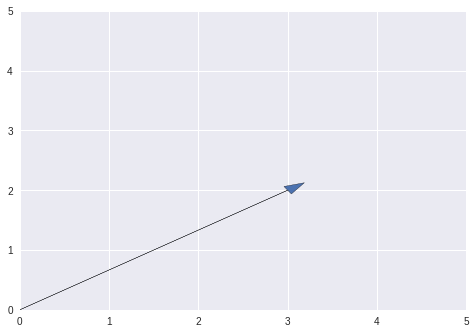

In [168]:
import matplotlib.pyplot as plt;
plt.style.use('seaborn');
plt.xlim(0, 5);
plt.ylim(0, 5);
plt.arrow(0, 0, 3, 2, head_width = 0.15);
plt.show();

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [0]:
import numpy as np;
def get_vector_norm(v):
  return np.sqrt(sum(v));

In [170]:
b = [17, -4, -2, 1];
get_vector_norm(b)

3.4641016151377544

The norm represents the magnitude (length) of the vector.

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [0]:
def get_dot_product(v1, v2):
  if(len(v1) == len(v2)):
    length = len(v1);
    sum = 0;
    for i in range(length):
      sum += v1[i] * v2[i];
    return sum;

In [172]:
c = [3, 7, -2, 12];
d = [9, -7, 4, 6];

get_dot_product(c, d)

42

The vectors are not orthogonal because their dot product is not equal to zero.

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [173]:
e = np.matrix([[7, 4, 2], [1, 3, -1], [2, 6, -4]]);
eInv = np.linalg.inv(e);
eT = e.T;
np.matmul(eInv, eT)

matrix([[-1.47058824, -2.58823529, -5.76470588],
        [ 2.82352941,  3.02941176,  6.58823529],
        [ 3.        ,  3.5       ,  8.        ]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [174]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [175]:
##### Your Code Here #####
df.describe()
  

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [0]:
def get_mean(v):
  return sum(v)/len(v);

def get_variance(v):
  mean = get_mean(v);
  sum = 0;
  for i in v:
    sum += np.square(i-mean);
  return sum/(len(v)-1);
  
def get_standard_deviation(v):
  mean = get_mean(v);
  #Subtract mean from item
  #Square the Difference
  #Add the values
  sum = 0;
  for i in v:
    sum += np.square(i-mean);
  return np.sqrt(sum/len(v));

In [177]:
print("Customers:\nMean:", get_mean(customers), "\nVariance:", get_variance(customers), "\nStandard Deviation:", get_standard_deviation(customers));
print("\nSnow:\nMean:", get_mean(snow), "\nVariance:", get_variance(snow), "\nStandard Deviation:", get_standard_deviation(snow));

Customers:
Mean: 1135.7142857142858 
Variance: 98761.90476190478 
Standard Deviation: 290.95199127087926

Snow:
Mean: 2.7142857142857144 
Variance: 8.571428571428571 
Standard Deviation: 2.7105237087157534


In [178]:
print("Customers:\nMean:", np.mean(customers), "\nVariance:", np.var(customers), "\nStandard Deviation:", np.std(customers));
print("\nSnow:\nMean:", np.mean(snow), "\nVariance:", np.var(snow), "\nStandard Deviation:", np.std(snow));

Customers:
Mean: 1135.7142857142858 
Variance: 84653.06122448981 
Standard Deviation: 290.95199127087926

Snow:
Mean: 2.7142857142857144 
Variance: 7.346938775510203 
Standard Deviation: 2.7105237087157534


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [179]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [180]:
df.Cheese.describe()

count      4.000000
mean      94.250000
std       18.856917
min       66.000000
25%       93.750000
50%      103.000000
75%      103.500000
max      105.000000
Name: Cheese, dtype: float64

In [181]:
##### Your Code Here #####
import sklearn.preprocessing as pros;
dfstd = df.copy()
for i in range(1, 18):
  dfstd.iloc[:, i] = (dfstd.iloc[:, i] - dfstd.iloc[:, i].mean()) / dfstd.iloc[:, i].std()
dfstd.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,0.570083,-0.015152,-0.224774,0.558227,-0.547700,0.113060,-0.389777,0.747650,0.327129,-0.291214,0.697564,0.638613,-0.557999,-0.044962,-0.376921,0.090931,-0.119774
1,Wales,0.464021,-1.106061,1.038240,0.998043,1.330128,1.340571,0.377324,0.947023,1.213892,0.072804,1.014638,0.804795,1.454458,1.393816,-1.216104,0.729040,0.838419
2,Scotland,0.464021,-0.196970,0.470954,-0.287572,-0.950091,-0.468392,-1.156878,-0.614734,-0.429864,1.310463,-0.760979,-0.049855,-0.740950,-0.404656,1.031200,0.620562,0.646780
3,North Ireland,-1.498124,1.318182,-1.284421,-1.268698,0.167663,-0.985239,1.169331,-1.079939,-1.111157,-1.092053,-0.951223,-1.393554,-0.155508,-0.944198,0.561826,-1.440533,-1.365425


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

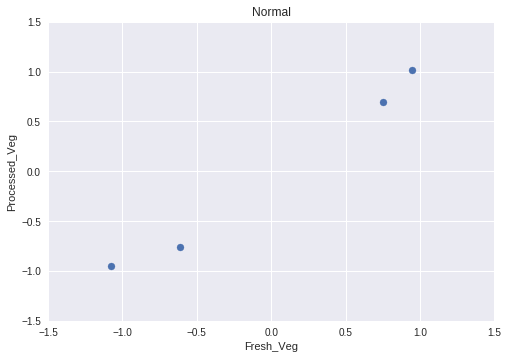

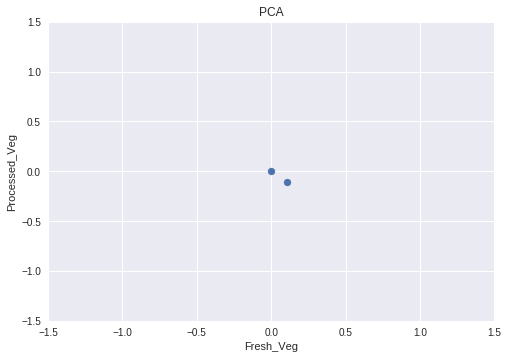

In [182]:
##### Your Code Here #####
from sklearn.decomposition import PCA;

plt.title('Normal');
plt.scatter(dfstd.Fresh_Veg, dfstd.Processed_Veg);
plt.xlim(-1.5, 1.5);
plt.ylim(-1.5, 1.5);
plt.xlabel('Fresh_Veg');
plt.ylabel('Processed_Veg');
plt.show();

pca = PCA();
pca.fit([dfstd.Fresh_Veg, dfstd.Processed_Veg]);
plt.title('PCA');
P = pca.transform([dfstd.Fresh_Veg, dfstd.Processed_Veg])
plt.xlim(-1.5, 1.5);
plt.ylim(-1.5, 1.5);
plt.scatter([P[0][0], P[0][1]], [P[1][0], P[1][1]]);
plt.xlabel('Fresh_Veg');
plt.ylabel('Processed_Veg');
plt.show();

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [183]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


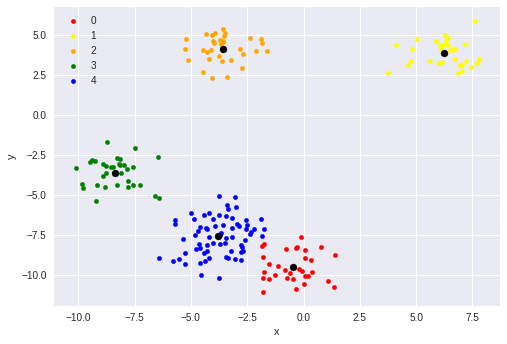

In [184]:
##### Your Code Here #####
from sklearn.cluster import KMeans;
kmeans = KMeans(5);
kmeans.fit(points);

colors = {0: 'red', 1: 'yellow', 2: 'orange', 3: 'green', 4: 'blue'}

fig, axes = plt.subplots()
groups = points.groupby(kmeans.labels_);
for key, group in groups:
  group.plot(ax = axes, kind='scatter', x='x', y='y', label = key, color=colors[key])
plt.scatter(kmeans.cluster_centers_.T[0], kmeans.cluster_centers_.T[1], color='black')
plt.show()